<a href="https://colab.research.google.com/github/JvSecate/PDI/blob/main/Atividades/5%20-%20Desafio%20Stanford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Obter imagens (Colab)

In [ ]:
!mkdir images
!wget -q -N -P images https://raw.githubusercontent.com/JvSecate/PDI//main/Atividades/images/pcbCroppedTranslated.png
!wget -q -N -P images https://raw.githubusercontent.com/JvSecate/PDI//main/Atividades/images/pcbCroppedTranslatedDefected.png
!wget -q -N -P images https://raw.githubusercontent.com/JvSecate/PDI//main/Atividades/images/Background_Subtraction_background.png
!mkdir videos
!wget -q -N -P videos https://raw.githubusercontent.com/JvSecate/PDI//main/Atividades/videos/output.avi

##Objetivo: Implementar códigos que utilizam operações básicas combinando duas imagens.

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import HTML
from base64 import b64encode
import os

###Verificação de defeitos em placas: Basicamente realizando uma operação de subtração entre uma imagem de uma placa sem defeito com uma placa com defeito é possivel encontrar defeitos no processo de fabricação: [Defect_Detection](https://web.stanford.edu/class/ee368/Handouts/Lectures/Examples/3-Combining-Images/Defect_Detection/)

In [ ]:
def plot(imagem_sem_defeito, imagem_com_defeito, imagem_diferenca, imagem_limiar):
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
  ax[0,0].imshow(imagem_sem_defeito, 'gray')
  ax[0,0].set_title("Imagem sem defeito")
  ax[0,1].imshow(imagem_com_defeito, 'gray')
  ax[0,1].set_title("Imagem com defeito")
  ax[1,0].imshow(imagem_diferenca, 'gray')
  ax[1,0].set_title("Diferença")
  ax[1,1].imshow(imagem_limiar, 'gray')
  ax[1,1].set_title("Imagem limiar")
  plt.show()

def verifica():
  imagem_sem_defeito = cv2.imread('images/pcbCroppedTranslated.png')
  imagem_com_defeito = cv2.imread('images/pcbCroppedTranslatedDefected.png')
  imagem_diferenca = cv2.absdiff(imagem_sem_defeito, imagem_com_defeito)
  imagem_diferenca_gray = cv2.cvtColor(imagem_diferenca, cv2.COLOR_BGR2GRAY)
  _, imagem_limiar = cv2.threshold(imagem_diferenca_gray, 30, 255,
  cv2.THRESH_BINARY)

  plot(imagem_sem_defeito, imagem_com_defeito, imagem_diferenca, imagem_limiar)

  #cv2.waitKey(0)
  #cv2.destroyAllWindows()

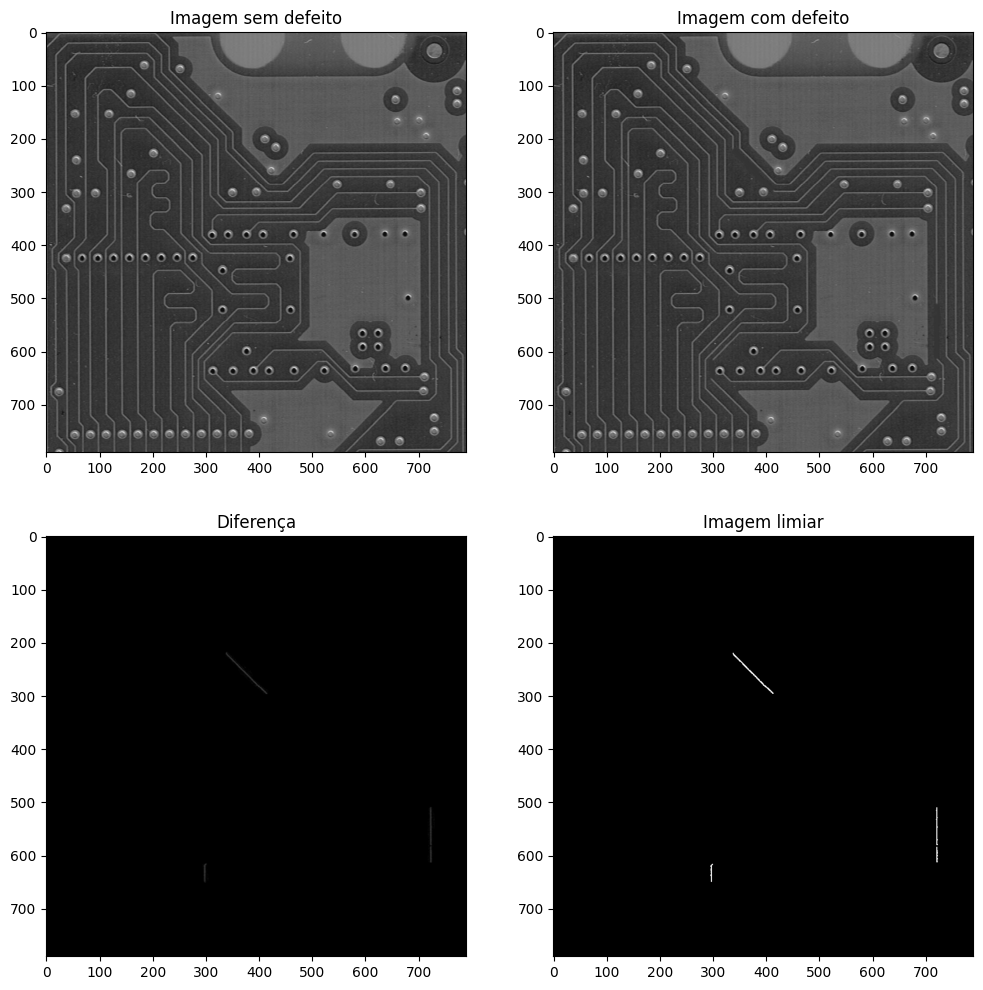

In [ ]:
verifica()

###Detecção de movimento: A partir de um vídeo, ao realizar a subtração do fundo da cena sem nenhuma pessoa é possível detectar movimentos: [Background_Subtraction](https://web.stanford.edu/class/ee368/Handouts/Lectures/Examples/3-Combining-Images/Background_Subtraction/)

In [ ]:
def convert_to_mp4(input_path, output_path):
    os.system(f"ffmpeg -i {input_path} -vcodec libx264 {output_path}")

#Exibe video na página do Colab
def display_video(video_path):
    video_file = open(video_path, "rb").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width=600 controls>
                        <source src="{video_url}" type="video/mp4">
                    </video>""")

def detec():
  #Considere output.avi como o arquivo de entrada. Sendo que esse é o nome original do arquivo fornecido
  cap = cv2.VideoCapture('videos/output.avi')
  img = Image.open('images/Background_Subtraction_background.png')
  if (cap.isOpened() == False):
    print("Error reading video file")
  frame_width = int(cap.get(3))
  frame_height = int(cap.get(4))
  frame_rate = 30
  size = (frame_width, frame_height)

  backSub = cv2.createBackgroundSubtractorMOG2()
  fourcc = cv2.VideoWriter_fourcc(*'MJPG')
  #Considere video_output.avi como o arquivo de saída.
  result = cv2.VideoWriter('videos/video_output.avi', fourcc, frame_rate, size, 0)
  background = np.array(img.convert('L'))

  while True:
    ret, frame = cap.read()
    if ret == True:
      gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      gray = cv2.absdiff(gray_frame, background)
      _, gray = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
      result.write(gray)
    else:
      break

  cap.release()
  result.release()
  print("Video saved as 'videos/video_output.avi'")

In [ ]:
detec()

Video saved as 'videos/video_output.avi'


##***Não é possivel visualizar os videos pela exibição do Github, abra no Colab:** <a href="https://colab.research.google.com/github/JvSecate/PDI/blob/main/Atividades/5%20-%20Desafio%20Stanford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Video Original

In [ ]:
convert_to_mp4('videos/output.avi', 'videos/output.mp4')
display_video('videos/output.mp4')

####Detecção de movimento

In [ ]:
convert_to_mp4('videos/video_output.avi', 'videos/video_output.mp4')
display_video('videos/video_output.mp4')